### `Use classification technique for prediction of Graduate Admissions from an Indian perspective`

**Importing required libraries**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load the data set**

In [91]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\task-1 internsavy\Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [93]:
df.duplicated().sum()

0

In [94]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [95]:
df.shape

(400, 9)

In [96]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [97]:
df.drop('Serial No.',axis=1,inplace=True)

In [98]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**`PIE CHART UNIVERSITY RANKING DISTRIBUTION :`**

In [99]:
df['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

`Observation:`There are almost 133 universitys have 3 star compared when to the count of 4 and 5 star is less.

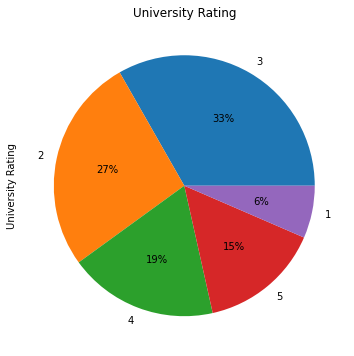

In [82]:
df['University Rating'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="University Rating")
plt.show()

**`Count plot of Research :`**

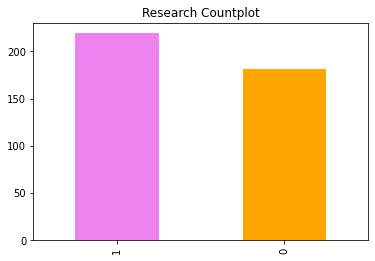

In [84]:
df.Research.value_counts().plot(kind='bar',title="Research Countplot",color=["violet","orange"])
plt.show()

 `Observation :`It is observed maximum research count is 1.

**`Splitting train and test data:`**

In [10]:
X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [11]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0


In [13]:
print(X_train.shape,y_train.shape)

print(X_test.shape,y_test.shape)

(320, 7) (320,)
(80, 7) (80,)


**`Standardizing the data :`**

In [14]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**`Model Training and Evaluation :`**

**`Linear regression :`**

In [15]:
from sklearn.linear_model import LinearRegression
regressor_Linear = LinearRegression()
regressor_Linear.fit(X_train_scaled,y_train)

LinearRegression()

In [16]:
y_test_pred = regressor_Linear.predict(X_test_scaled)

In [17]:
df_values = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

df_values.head()

,Actual,Predicted
209,0.68,0.651174
280,0.68,0.723687
33,0.90,0.935368
210,0.79,0.821643
93,0.44,0.581587


<AxesSubplot:xlabel='Chance of Admit ', ylabel='Count'>

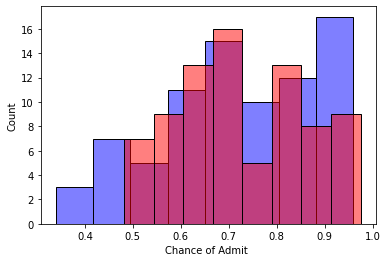

In [18]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [19]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


Mean Absolute Error:  0.04795673362091202
Mean Squared Error:  0.00461700337728501
Root Mean Squared Error:  0.06794853476922817


## **`Deep Learning`**

**`Creating Dense layers :`**

In [20]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [45]:
model=Sequential()
model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 7)                 56        
                                                                 
 dense_10 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


**`Compile :`**

In [70]:
model.compile(optimizer="Adam",loss='mean_squared_error')

**`Fitting :`**

In [71]:
save=model.fit(X_train_scaled,y_train,batch_size=10,epochs=150,verbose=1,validation_split=0.2)

Epoch 1/150
26/26 [==============================] - 1s 6ms/step - loss: 0.0029 - val_loss: 0.0056
Epoch 2/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0057
Epoch 3/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0056
Epoch 4/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0055
Epoch 5/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0056
Epoch 6/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0057
Epoch 7/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0056
Epoch 8/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0055
Epoch 9/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0055
Epoch 10/150
26/26 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0055
Epoch 11/

In [72]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

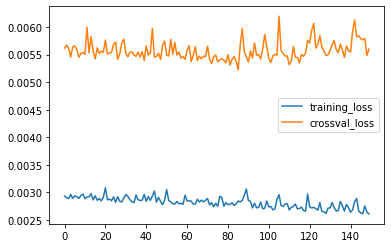

In [73]:
plt.plot(tl,label="training_loss")
plt.plot(cvl,label="crossval_loss")
plt.legend()

In [76]:
y_pred=model.predict(X_test_scaled)

3/3 [==============================] - 0s 2ms/step


In [77]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8197216558404535